In [6]:
# =============================================================================== [ DBSCAN ] =====================================================================
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

## + [ plotting def. ]  ===========================
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [7]:
iris = load_iris()
feature_name = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
irisDF = pd.DataFrame(data = iris.data, columns = feature_name)

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF["dbscan_cluster"] = dbscan_labels
irisDF["target"] = iris.target

iris_result = irisDF.groupby(["target"])["dbscan_cluster"].value_counts()
print(iris_result) # -1 : noise point

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


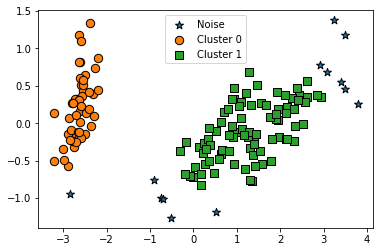

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 2109)
pca_transformed = pca.fit_transform(iris.data)
irisDF["ftr1"] = pca_transformed[:, 0]
irisDF["ftr2"] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, "dbscan_cluster", iscenter = False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


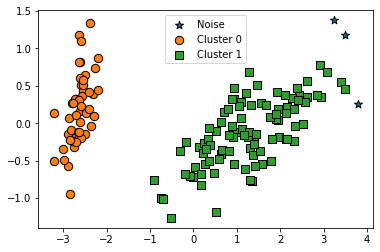

In [17]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
# dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')

dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter = False)

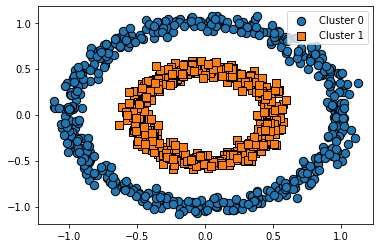

In [23]:
# ======================================================================= [ DBSCAN  ex2 ] =====================================================================
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans

X, y = make_circles(n_samples = 1000, shuffle = True, noise = 0.05, random_state = 0, factor = 0.5)
clusterDF = pd.DataFrame(data = X, columns = ["ftr1", "ftr2"])
clusterDF["target"] = y

visualize_cluster_plot(None, clusterDF, "target", iscenter = False)

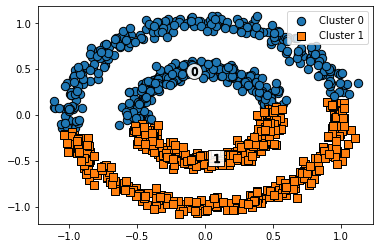

In [24]:
kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 2109)
kmeans_labels = kmeans.fit_predict(X)
clusterDF["kmeans_cluster"] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, "kmeans_cluster", iscenter = True)

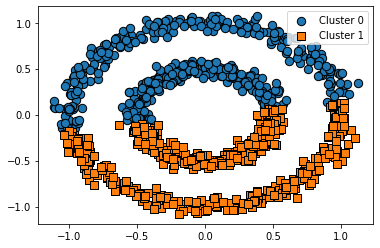

In [25]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2, random_state = 2109)
gmm_label = gmm.fit(X).predict(X)
clusterDF["gmm_cluster"] = gmm_label

visualize_cluster_plot(gmm, clusterDF, "gmm_cluster", iscenter = False)

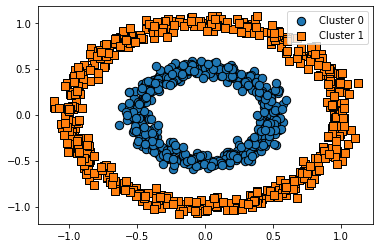

In [27]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples = 10, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(X)
clusterDF["dbscan_cluster"] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, "dbscan_cluster", iscenter = False)

In [28]:
# =============================================================================== [ exsample ] =====================================================================
import pandas as pd 
import datetime 
import math 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

retail_df = pd.read_excel("Online Retail.xlsx")
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [34]:
retail_df.apply(lambda x : (np.sum(pd.isna(x) / x.shape[0]) * 100)) # NA_prob 

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [35]:
retail_df = retail_df[retail_df["Quantity"] > 0]
retail_df = retail_df[retail_df["UnitPrice"] > 0]
retail_df = retail_df[retail_df["CustomerID"].notnull()]
retail_df.apply(lambda x : (np.sum(pd.isna(x) / x.shape[0]) * 100)) # NA_prob 

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [38]:
retail_df["Country"].value_counts()[:5]
retail_df = retail_df[retail_df["Country"] == "United Kingdom"]
print(retail_df.shape)

(354321, 8)


In [39]:
retail_df["sale_amount"] = retail_df["Quantity"] * retail_df["UnitPrice"]
retail_df["CustomerID"] = retail_df["CustomerID"].astype(int)

In [42]:
print(retail_df["CustomerID"].value_counts().head(5))
print(retail_df.groupby("CustomerID")["sale_amount"].sum().sort_values(ascending = False)[:5])

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [43]:
aggregations = {"InvoiceDate" : "max", "InvoiceNo" : "count", "sale_amount" : "sum"}
cust_df = retail_df.groupby("CustomerID").agg(aggregations)
cust_df = cust_df.rename(columns = {"InvoiceDate" : "Recency", "InvoiceNo" : "Frequency", "sale_amount" : "Monetary"})
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [44]:
import datetime as dt 

cust_df["Recency"] = dt.datetime(2011, 12, 10) - cust_df["Recency"]
cust_df["Recency"] = cust_df["Recency"].apply(lambda x : x.days + 1)
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


           Recency    Frequency       Monetary
count  3920.000000  3920.000000    3920.000000
mean     92.742092    90.388010    1864.385601
std      99.533485   217.808385    7482.817477
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     300.280000
50%      51.000000    41.000000     652.280000
75%     143.000000    99.250000    1576.585000
max     374.000000  7847.000000  259657.300000


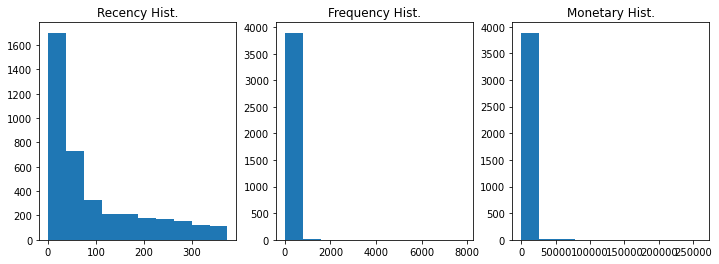

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (12, 4), nrows = 1, ncols = 3)
ax1.set_title("Recency Hist.")
ax1.hist(cust_df["Recency"])
ax2.set_title("Frequency Hist.")
ax2.hist(cust_df["Frequency"])
ax3.set_title("Monetary Hist.")
ax3.hist(cust_df["Monetary"])

print(cust_df[["Recency", "Frequency", "Monetary"]].describe())

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[["Recency", "Frequency", "Monetary"]].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters = 3, random_state = 2109)
labels = kmeans.fit_predict(X_features_scaled)
cust_df["cluster_label"] = labels

print("실루엣 스코어 : {0:.3f}".format(silhouette_score(X_features, labels)))

실루엣 스코어 : -0.120


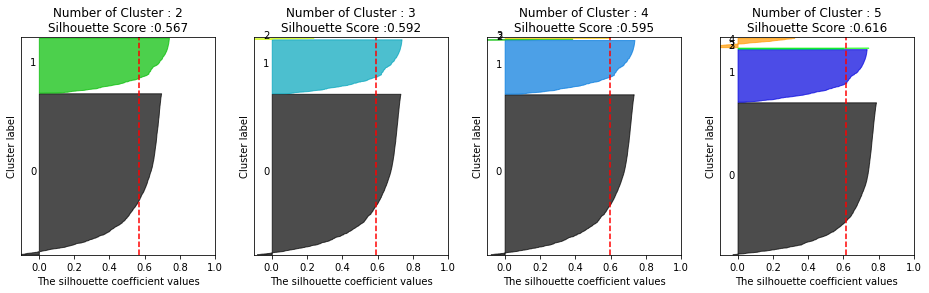

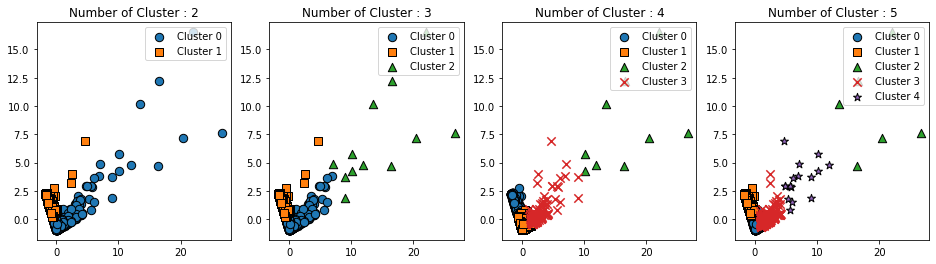

In [52]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [53]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

cust_df["Recency_log"] = np.log1p(cust_df["Recency"])
cust_df["Frequency_log"] = np.log1p(cust_df["Frequency"])
cust_df["Monetary_log"] = np.log1p(cust_df["Monetary"])

X_features = cust_df[["Recency_log", "Frequency_log", "Monetary_log"]].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters = 3, random_state = 2109)
labels = kmeans.fit_predict(X_features_scaled)
cust_df["cluster_label"] = labels

print("실루엣 스코어 : {0:.3f}".format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어 : 0.305


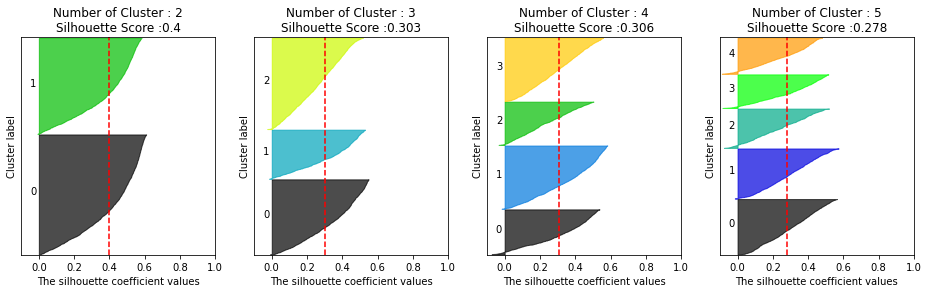

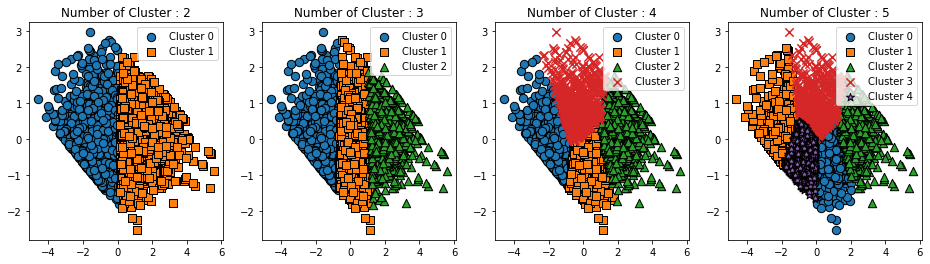

In [54]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)